# Zillow Exploration
After successfully splitting the data using our functions we will explore the data to determine best features to use in our modeling. Per our guidance, the MVP will use square feet of the home, number of bedrooms, and number of bathrooms to attempt to predict the price (measured as taxvaluedollarcnt) of the home. 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
import wrangle
import prepare
import acquire
print('Success')

Success


# Testing Functions
The below lines of code is used to ensure that the acquire and prepare files are working correctly and to put the zillow data into Dataframes for processing. We will then split the DFs into train, validate, test data sets. 

In [4]:
zillow = acquire.load_zillow_data()
zillow.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [5]:
zillow.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [3]:
df = prepare.prepare_zillow()
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
20,11324547,2.0,4.0,3633.0,6037.0,2.0,34560018.0,-118169806.0,9826.0,0100,...,3101.0,97329.0,0.0,2005.0,222321.0,296425.0,2016.0,74104.0,6941.39,NaN
31,11544747,4.0,3.0,1620.0,6037.0,4.0,33996200.0,-118438000.0,NaN,0100,...,3101.0,96047.0,0.0,2011.0,339532.0,847770.0,2016.0,508238.0,10244.94,NaN
33,11585547,2.0,3.0,2077.0,6037.0,2.0,34012977.0,-118479243.0,6490.0,0100,...,3101.0,96152.0,0.0,1926.0,210192.0,646760.0,2016.0,436568.0,7924.68,NaN
110,12716947,1.0,3.0,1244.0,6037.0,1.0,33953559.0,-118083855.0,6021.0,0100,...,3101.0,96201.0,0.0,1950.0,108040.0,169471.0,2016.0,61431.0,2532.88,NaN
111,12757147,2.0,3.0,1300.0,6037.0,2.0,33897134.0,-118102953.0,4917.0,0100,...,3101.0,96193.0,0.0,1950.0,77415.0,233266.0,2016.0,155851.0,3110.99,NaN


In [4]:
dfmvp = prepare.prepare_zillow_mvp()
dfmvp.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
20,2.0,4.0,3633.0,296425.0
31,4.0,3.0,1620.0,847770.0
33,2.0,3.0,2077.0,646760.0
110,1.0,3.0,1244.0,169471.0
111,2.0,3.0,1300.0,233266.0


In [5]:
help(wrangle)

Help on module wrangle:

NAME
    wrangle

FUNCTIONS
    add_encoded_columns(df, drop_encoders=True)
        Signature: add_encoded_columns(df, drop_encoders=True)
        Docstring:
        This function accepts a DataFrame, creates encoded columns for object dtypes,
        and returns a DataFrame with or without object dtype columns.
        
        Parameters
        ----------
        df : pandas.core.frame.DataFrame
        
        
        Returns
        -------
        f, encoded_columns
    
    add_scaled_columns(X_train, X_validate, X_test, scaler=MinMaxScaler())
        Signature: add_scaled_columns(train, validate, test, scaler)
        Docstring:
        
        Parameters
        ----------
        pandas.core.frame.DataFrame
        
        
        Returns
        -------
        X_train, X_validate, X_test
    
    attributes_target_split(data_set, target_name)
        Signature: attributes_target_split(df, target)
        Docstring:
        
        Parameters
 

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.wrangle_data(dfmvp, 'taxvaluedollarcnt', modeling=True)


In [14]:
train = pd.concat([X_train, y_train], axis = 1)
train.corr()

,bathroomcnt_scaled,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt
bathroomcnt_scaled,1.000000,0.640005,0.644051,0.508227
bedroomcnt_scaled,0.640005,1.000000,0.466375,0.258013
calculatedfinishedsquarefeet_scaled,0.644051,0.466375,1.000000,0.468594
taxvaluedollarcnt,0.508227,0.258013,0.468594,1.000000


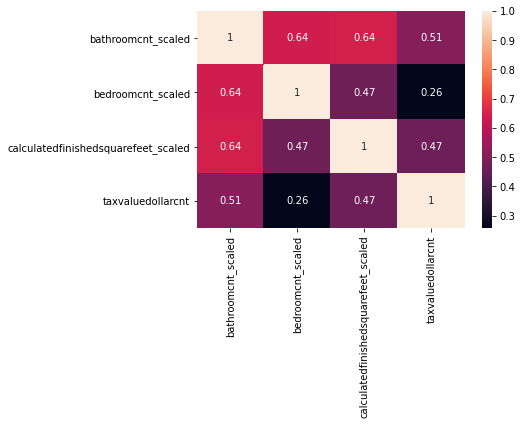

In [15]:
sns.heatmap(train.corr(), annot=True)

We'll do a correlation test on the highest correlations (bedroom count and calculated square footage)

* $H0$ - There is no relationship between taxvaluedollarcnt and bathroomcnt"
* $Ha$ - There is a relationship between taxvaluedollarcnt and bathroomcnt

In [29]:
from math import sqrt
from scipy import stats
a = .05
corr, p = stats.pearsonr(train['calculatedfinishedsquarefeet_scaled'], train['taxvaluedollarcnt'])
print(corr, p)
if p > a:
    print('We Fail to Reject H0')
else:
    print('We Reject H0a')

0.4685943340719585 0.0
We Reject H0a


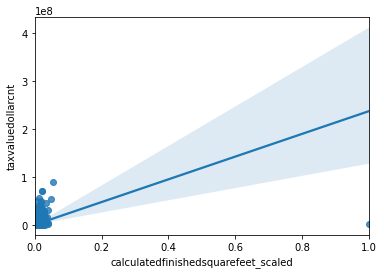

In [36]:
sns.regplot(data=train, x='calculatedfinishedsquarefeet_scaled', y = 'taxvaluedollarcnt')

In [ ]:
corr, p = stats.pearsonr(train['bedroomcnt_scaled'], train['taxvaluedollarcnt'])
print(corr, p)
if p > a:
    print('We Fail to Reject H0')
else:
    print('We Reject H0a

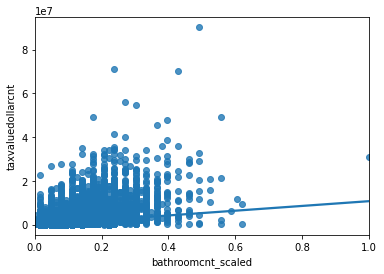

In [35]:
sns.regplot(data=train, x='bathroomcnt_scaled', y = 'taxvaluedollarcnt')